In [38]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura inicial dos datasets

In [47]:
# Taxa de ocupação mensalizada
desocupacao = pd.read_csv('../data/desocupacao.csv')
desocupacao.head()

,Data,Taxa de desocupação - mensalizada - (%) - Instituto de Pesquisa Econômica Aplicada - PNADC12_TDESOCM12,Unnamed: 2
0,2012.01,8.4,NaN
1,2012.02,7.9,NaN
2,2012.03,7.7,NaN
3,2012.04,7.8,NaN
4,2012.05,7.6,NaN


In [48]:
pib = pd.read_csv('../data/pib.csv')
pib.head()  

,Data,PIB - R$ - Banco Central do Brasil- Boletim- Seção Atividade Econômica (Bacen / Boletim / Ativ. Ec.) - BM12_PIB12,Unnamed: 2
0,1990.01,0.2,NaN
1,1990.02,0.4,NaN
2,1990.03,0.8,NaN
3,1990.04,0.7,NaN
4,1990.05,0.8,NaN


In [49]:
ipca = pd.read_csv('../data/ipca.csv')
ipca.head()

,Data,IPCA - geral - taxa de variação - (% a.m.) - Instituto Brasileiro de Geografia e Estatística- Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC) - PRECOS12_IPCAG12,Unnamed: 2
0,1980.01,6.615649,NaN
1,1980.02,4.616919,NaN
2,1980.03,6.038389,NaN
3,1980.04,5.286114,NaN
4,1980.05,5.702721,NaN


## Ajustes dos datasets

### Renomeando e excluindo colunas desnecessárias

In [50]:
# Simplificar o nome das colunas e excluir colunas desnecessárias
ipca.columns =  ['Data','IPCA(% a.m.)','Unnamed: 2']
ipca = ipca.dropna(axis=1)
ipca.head()

,Data,IPCA(% a.m.)
0,1980.01,6.615649
1,1980.02,4.616919
2,1980.03,6.038389
3,1980.04,5.286114
4,1980.05,5.702721


In [51]:
# Simplificar o nome das colunas e excluir colunas desnecessárias
desocupacao.columns = ['Data', 'Desocupacao(% a.m.)', 'Unnamed: 2']
desocupacao = desocupacao.dropna(axis=1)
desocupacao.head()

,Data,Desocupacao(% a.m.)
0,2012.01,8.4
1,2012.02,7.9
2,2012.03,7.7
3,2012.04,7.8
4,2012.05,7.6


In [52]:
# Simplificar o nome das colunas e excluir colunas desnecessárias
pib.columns = ['Data', 'PIB(% a.m.)', 'Unnamed: 2']
pib = pib.dropna(axis=1)
pib.head()

,Data,PIB(% a.m.)
0,1990.01,0.2
1,1990.02,0.4
2,1990.03,0.8
3,1990.04,0.7
4,1990.05,0.8


### Formatando tipos de dados e redefinindo o index

In [53]:
# Ajustar o tipo de dado da coluna 'Data' para datetime
ipca['Data'] = ipca['Data'].astype(str).str.replace('.', '-')
ipca['Data'] = pd.to_datetime(ipca['Data'], format='%Y-%m')
ipca.set_index('Data', inplace=True)
ipca.head()

,IPCA(% a.m.)
Data,
1980-01-01,6.615649
1980-02-01,4.616919
1980-03-01,6.038389
1980-04-01,5.286114
1980-05-01,5.702721


In [54]:
# Ajustar o tipo de dado da coluna 'Data' para datetime
pib['Data'] = pib['Data'].astype(str).str.replace('.', '-')
pib['Data'] = pd.to_datetime(pib['Data'], format='%Y-%m')
pib.set_index('Data', inplace=True)
pib.head()

,PIB(% a.m.)
Data,
1990-01-01,0.2
1990-02-01,0.4
1990-03-01,0.8
1990-04-01,0.7
1990-05-01,0.8


In [55]:
# Ajustar o tipo de dado da coluna 'Data' para datetime
desocupacao['Data'] = desocupacao['Data'].astype(str).str.replace('.', '-')
desocupacao['Data'] = pd.to_datetime(desocupacao['Data'], format='%Y-%m')
desocupacao.set_index('Data', inplace=True)
desocupacao.head()

,Desocupacao(% a.m.)
Data,
2012-01-01,8.4
2012-02-01,7.9
2012-03-01,7.7
2012-04-01,7.8
2012-05-01,7.6


## Verificando o melhor intervalo

In [56]:
print(ipca.index.min(), pib.index.min(), desocupacao.index.min())
print(ipca.index.max(), pib.index.max(), desocupacao.index.max())

1980-01-01 00:00:00 1990-01-01 00:00:00 2012-01-01 00:00:00
2025-06-01 00:00:00 2025-06-01 00:00:00 2025-05-01 00:00:00


In [57]:
ipca = ipca.sort_index()
ipca = ipca.loc['2012-01-01':'2025-05-01']
pib = pib.sort_index()
pib = pib.loc['2012-01-01':'2025-05-01']
desocupacao = desocupacao.sort_index()
desocupacao = desocupacao.loc['2012-01-01':'2025-05-01']

# Visualizando com gráficos

<Axes: xlabel='Data'>

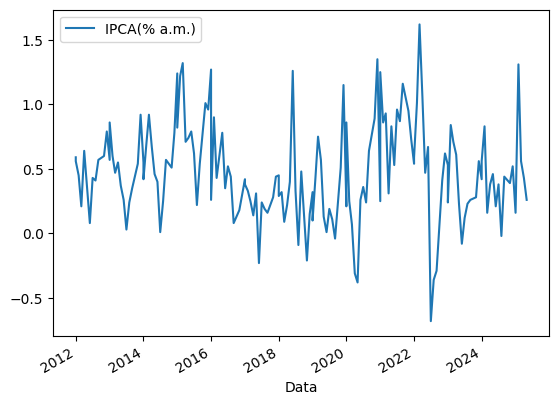

In [58]:
ipca.plot()

<Axes: xlabel='Data'>

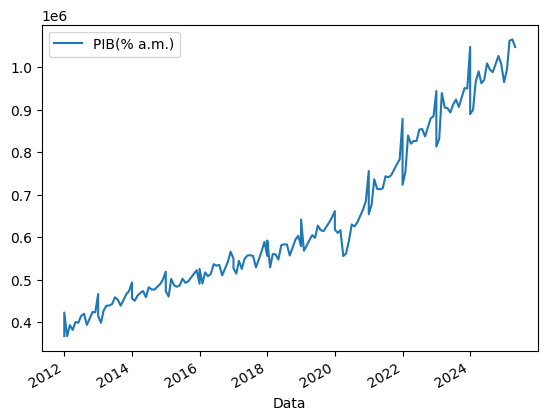

In [59]:
pib.plot()

<Axes: xlabel='Data'>

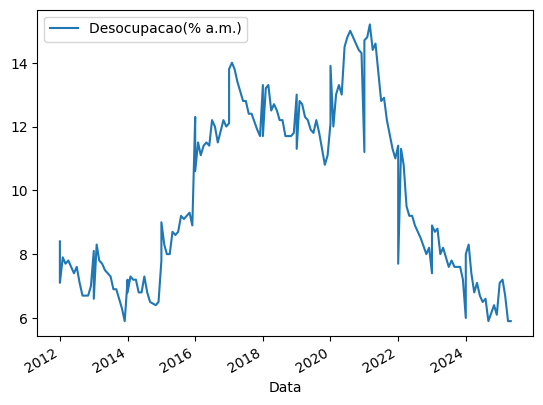

In [60]:
desocupacao.plot()

In [63]:
# Consolidação dos datasets em um único DataFrame
df = pd.concat([ipca, pib, desocupacao], axis=1)
df.columns = ['IPCA', 'PIB', 'Desocupacao']
df = df.dropna()    
df

,IPCA,PIB,Desocupacao
Data,,,
2012-01-01,0.59,367215.4,8.4
2012-01-01,0.56,422672.1,7.1
2012-02-01,0.45,367177.3,7.9
2012-03-01,0.21,392996.5,7.7
2012-04-01,0.64,381795.3,7.8
...,...,...,...
2025-01-01,0.16,964246.7,7.1
2025-02-01,1.31,993590.8,7.2
2025-03-01,0.56,1061741.3,6.7


<Axes: xlabel='Data'>

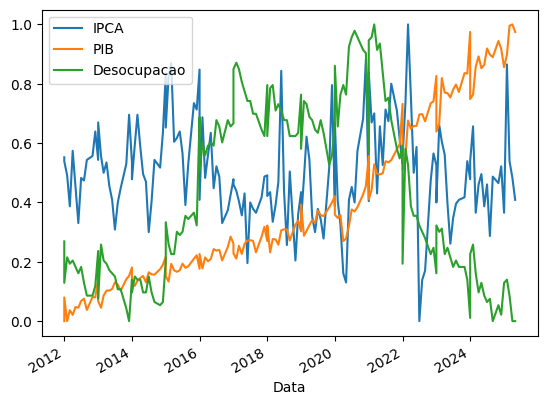

In [64]:
## Normalizando os dados
df_normalizado = (df - df.min()) / (df.max() - df.min())
df_normalizado.plot()

In [65]:
df_normalizado['Ano'] = df.index.year
df_normalizado.head()

,IPCA,PIB,Desocupacao,Ano
Data,,,,
2012-01-01,0.552174,0.000055,0.268817,2012
2012-01-01,0.539130,0.079549,0.129032,2012
2012-02-01,0.491304,0.000000,0.215054,2012
2012-03-01,0.386957,0.037011,0.193548,2012
2012-04-01,0.573913,0.020954,0.204301,2012


## Gerar arquivo mantendo as formatações dos tipos de dados

In [66]:
df_normalizado.to_parquet('dados_normalizados.parquet')

## Lendo do repositório

In [79]:
df_leitura = pd.read_parquet("https://github.com/avellar1975/imersao_alura/blob/main/notebooks/dados_normalizados.parquet?raw=true")
df_leitura.head(13)

,IPCA,PIB,Desocupacao,Ano
Data,,,,
2012-01-01,0.552174,0.000055,0.268817,2012
2012-01-01,0.539130,0.079549,0.129032,2012
2012-02-01,0.491304,0.000000,0.215054,2012
2012-03-01,0.386957,0.037011,0.193548,2012
2012-04-01,0.573913,0.020954,0.204301,2012
2012-05-01,0.452174,0.047453,0.182796,2012
2012-06-01,0.330435,0.045207,0.161290,2012
2012-07-01,0.482609,0.068003,0.182796,2012
2012-08-01,0.473913,0.075585,0.129032,2012


In [78]:
df_leitura.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 161 entries, 2012-01-01 to 2025-05-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IPCA         161 non-null    float64
 1   PIB          161 non-null    float64
 2   Desocupacao  161 non-null    float64
 3   Ano          161 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 5.7 KB
